<a href="https://colab.research.google.com/github/AnandDaksh/Crop-Disease-Classification/blob/main/(ResNet)_Potato_Plant_Village_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import ResNet50

In [4]:
# Define classes
classes = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]


In [5]:
# Define the path to the folder containing the images
data_dir = "/content/drive/MyDrive/Plant Village Datasets/Potato"


In [6]:
# Initialize ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into training and validation sets
)


In [7]:
# Load and augment the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),  # Resizing images to 32x32 to match the input shape of ResNet50
    batch_size=32,
    class_mode='sparse',  # Since we have sparse categorical labels
    shuffle=True,
    subset='training'  # Specify that this is the training set
)

Found 1722 images belonging to 3 classes.


In [8]:
# Load the test data without augmentation
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    shuffle=False,  # No need to shuffle the test data
    subset='validation'  # Specify that this is the validation set
)

Found 430 images belonging to 3 classes.


In [9]:
# Load the ResNet50 model without the top classification layer and with pretrained weights on ImageNet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [10]:
# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False


In [11]:
# Define your custom classification layers without dropout
x = layers.Flatten()(resnet.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(len(classes), activation='softmax')(x)  # Use len(classes) for number of output classes

In [12]:
# Create the model
resnet_model = models.Model(resnet.input, output)

In [13]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Fit the model
history = resnet_model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator
)


Epoch 1/100
54/54 [==============================] - 34s 623ms/step - loss: 0.0822 - accuracy: 0.9681 - val_loss: 0.1677 - val_accuracy: 0.9302
Epoch 2/100
54/54 [==============================] - 19s 344ms/step - loss: 0.0812 - accuracy: 0.9698 - val_loss: 0.2482 - val_accuracy: 0.9093
Epoch 3/100
54/54 [==============================] - 20s 371ms/step - loss: 0.0830 - accuracy: 0.9739 - val_loss: 0.1596 - val_accuracy: 0.9419
Epoch 4/100
54/54 [==============================] - 21s 385ms/step - loss: 0.0757 - accuracy: 0.9704 - val_loss: 0.2081 - val_accuracy: 0.9256
Epoch 5/100
54/54 [==============================] - 21s 384ms/step - loss: 0.0908 - accuracy: 0.9669 - val_loss: 0.1900 - val_accuracy: 0.9442
Epoch 6/100
54/54 [==============================] - 20s 373ms/step - loss: 0.0818 - accuracy: 0.9686 - val_loss: 0.2023 - val_accuracy: 0.9279
Epoch 7/100
54/54 [==============================] - 19s 346ms/step - loss: 0.0853 - accuracy: 0.9663 - val_loss: 0.2323 - val_accuracy:

In [25]:
# Evaluate the model
test_loss, test_accuracy = resnet_model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

14/14 [==============================] - 3s 215ms/step - loss: 0.2152 - accuracy: 0.9419
Test Accuracy: 0.9418604373931885


In [26]:
# Get the predicted classes for the test data
y_pred = np.argmax(resnet_model.predict(test_generator), axis=1)

14/14 [==============================] - 5s 326ms/step


In [27]:
# Get true labels
y_true = test_generator.classes

In [28]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
accuracy_percentage = accuracy * 100

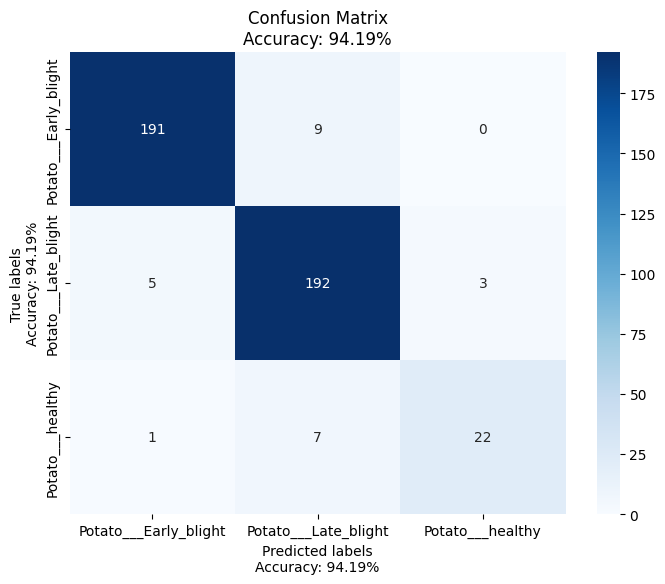

In [29]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()

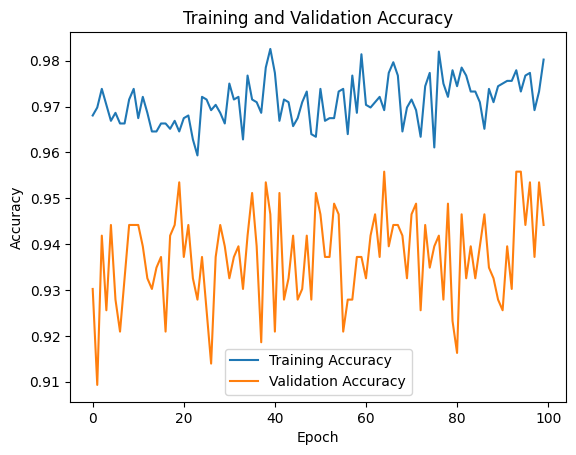

In [30]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

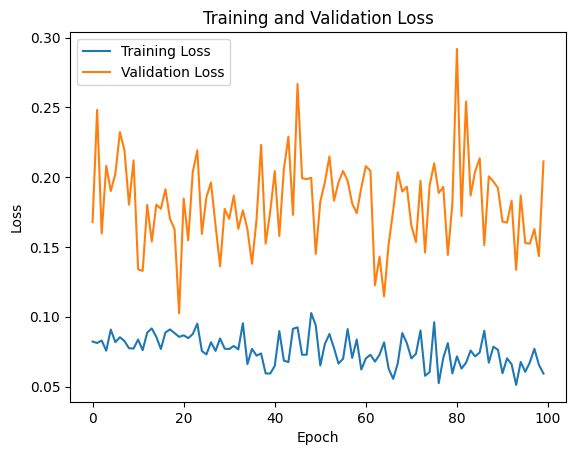

In [31]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [32]:
# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print("Predicted class name:", predicted_class_name)

Predicted class name: Potato___Early_blight


Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
Epoch 1/80
54/54 [==============================] - 28s 371ms/step - loss: 0.5005 - accuracy: 0.8362 - val_loss: 0.2664 - val_accuracy: 0.9163
Epoch 2/80
54/54 [==============================] - 17s 317ms/step - loss: 0.2478 - accuracy: 0.9181 - val_loss: 0.3276 - val_accuracy: 0.8698
Epoch 3/80
54/54 [==============================] - 18s 341ms/step - loss: 0.2597 - accuracy: 0.9082 - val_loss: 0.2366 - val_accuracy: 0.9116
Epoch 4/80
54/54 [==============================] - 18s 323ms/step - loss: 0.2057 - accuracy: 0.9239 - val_loss: 0.2644 - val_accuracy: 0.9000
Epoch 5/80
54/54 [==============================] - 19s 356ms/step - loss: 0.2148 - accuracy: 0.9181 - val_loss: 0.2317 - val_accuracy: 0.9163
Epoch 6/80
54/54 [==============================] - 17s 320ms/step - loss: 0.1798 - accuracy: 0.9332 - val_loss: 0.3132 - val_accuracy: 0.8814
Epoch 7/80
54/54 [==============================] - 19s 353

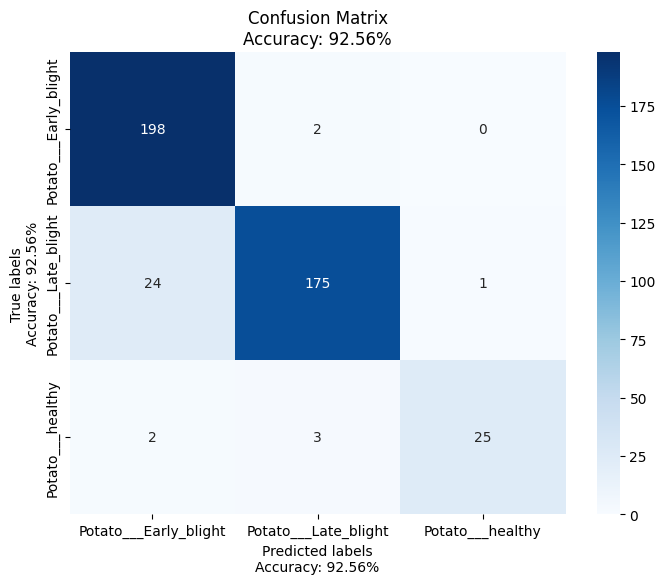

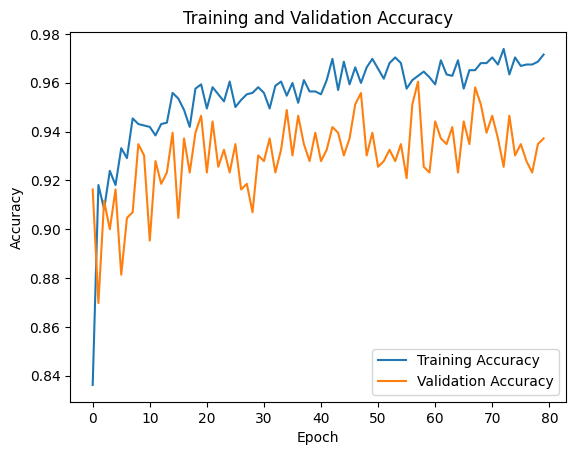

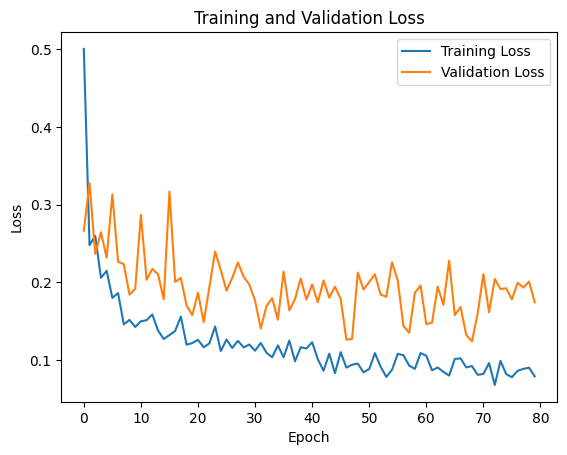

Predicted class name: Potato___Early_blight


In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.applications import ResNet50

# Define classes
classes = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

# Define the path to the folder containing the images
data_dir = "/content/drive/MyDrive/Plant Village Datasets/Potato"

# Initialize ImageDataGenerator for data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Splitting the data into training and validation sets
)

# Load and augment the training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),  # Resizing images to 32x32 to match the input shape of ResNet50
    batch_size=32,
    class_mode='sparse',  # Since we have sparse categorical labels
    shuffle=True,
    subset='training'  # Specify that this is the training set
)

# Load the test data without augmentation
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    shuffle=False,  # No need to shuffle the test data
    subset='validation'  # Specify that this is the validation set
)

# Load the ResNet50 model without the top classification layer and with pretrained weights on ImageNet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers in the ResNet model
for layer in resnet.layers:
    layer.trainable = False

# Define your custom classification layers without dropout
x = layers.Flatten()(resnet.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(len(classes), activation='softmax')(x)  # Use len(classes) for number of output classes

# Create the model
resnet_model = models.Model(resnet.input, output)

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = resnet_model.fit(
    train_generator,
    epochs=80,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_accuracy = resnet_model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

# Get the predicted classes for the test data
y_pred = np.argmax(resnet_model.predict(test_generator), axis=1)

# Get true labels
y_true = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
accuracy_percentage = accuracy * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.ylabel(f'True labels\nAccuracy: {accuracy_percentage:.2f}%')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy_percentage:.2f}%')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Get the predicted class name
predicted_class_name = classes[y_pred[3]]
print("Predicted class name:", predicted_class_name)
